# Reading the 2D WFS layers from Python

In this tutorial we go through how to read the 2D layers of the WFS service.
For accessing the WFS, we utilize the [OWSlib](https://geopython.github.io/OWSLib/usage.html#wfs) library.

In [17]:
from pathlib import Path
import csv
import json

from owslib.wfs import WebFeatureService
from shapely import wkt
from shapely.geometry import shape, GeometryCollection

In [2]:
WFS_URL = "https://data.3dbag.nl/api/BAG3D_v2/wfs"

Load our area of interest (AOI).

In [3]:
with (Path("data") / "aoi.csv").resolve().open("r") as fo:
    wktreader = csv.reader(fo)
    # Skip the header and read only the first row
    aoi_wkt, _ = [(wkt, _id) for wkt, _id in wktreader][1]

aoi_poly = wkt.loads(aoi_wkt)

Access the WFS and read its contents.

In [4]:
wfs11 = WebFeatureService(url=WFS_URL, version='1.1.0')

List the available layers.

In [10]:
list(wfs11.contents)

['BAG3D_v2:lod12', 'BAG3D_v2:lod13', 'BAG3D_v2:lod22', 'BAG3D_v2:bag_tiles_3k']

List the metadata information.

In [ ]:
for layer, meta in wfs11.items():
    print(meta.__dict__)

For now, we work with the LoD1.2 layer.

In [ ]:
WFS_LAYER = "BAG3D_v2:lod12"

Request the features within the bounding box of our AOI.

In [19]:
response = wfs11.getfeature(
    typename=WFS_LAYER,
    bbox=aoi_poly.bounds,
    srsname='urn:x-ogc:def:crs:EPSG:28992',
    outputFormat='json'
)

## Shapely

And load them into a Shapely GeometryCollection.
However, Shapely doesn't attach attribute info to the geometries.

In [20]:
j = json.loads(response.read().decode("utf-8"))
features = j["features"]
lod12 = GeometryCollection([shape(feature["geometry"]) for feature in features])

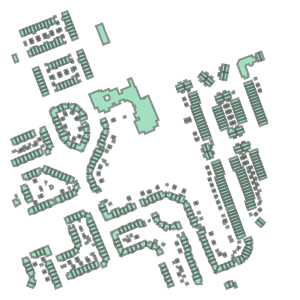

In [22]:
lod12
